In [1]:
import numpy as np
import pandas as pd
from astropy.io import ascii
import os
import matplotlib.pyplot as plt
import mpl_scatter_density
from sklearn.mixture import GaussianMixture

In [2]:
data = pd.read_csv('Catalogues/NGC5822_6.csv')
data

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,Solved,nueff,pscol,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
0,226.540815,-56.317269,5880538895205342848,1.2212,-7.561,-3.855,95,NaN,1.2681,1.020,20.414282,21.562517,19.130104,2.432413,NaN,-37.108574,226.540876,-56.317251,1.178051
1,226.486014,-56.259646,5880539999013530240,1.3248,-6.493,-4.649,95,NaN,1.2593,1.095,20.303038,21.424482,18.701237,2.723246,NaN,-37.064888,226.486066,-56.259625,1.279951
2,226.948946,-56.298907,5880548657675042688,1.2709,-7.299,-4.039,95,NaN,1.3149,1.015,20.301525,21.490753,19.159494,2.331259,NaN,-37.013984,226.949004,-56.298889,1.243095
3,227.291515,-56.203286,5880553017058278656,1.2268,-6.955,-4.249,95,NaN,1.3698,1.040,19.986824,21.398617,18.599062,2.799555,NaN,-36.859565,227.291570,-56.203267,1.212646
4,227.336485,-56.170772,5880553193167640576,1.2236,-6.473,-6.232,31,1.537,NaN,1.060,13.967035,14.326902,13.421547,0.905355,-21.07,-36.820520,227.336537,-56.170745,1.264165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6353,226.740458,-52.452474,5900298807075763712,1.3281,-5.750,-4.136,95,NaN,1.3074,0.989,20.389110,21.277702,19.652750,1.624952,NaN,-33.427750,226.740500,-52.452456,1.301355
6354,226.453067,-52.509047,5900300456342555520,1.1632,-8.663,-3.604,95,NaN,1.4698,0.962,20.393826,21.527254,19.700907,1.826347,NaN,-33.538558,226.453130,-52.509031,1.172742
6355,226.449560,-52.506863,5900300456374222720,1.3185,-5.452,-3.848,95,NaN,1.2504,1.021,20.196398,20.947050,19.314562,1.632488,NaN,-33.537197,226.449600,-52.506846,1.275855
6356,226.466252,-52.457901,5900300662501540096,1.2761,-5.790,-4.014,95,NaN,1.6429,0.985,20.559767,21.270952,19.234112,2.036840,NaN,-33.487614,226.466295,-52.457883,1.321704


In [3]:
df1 = pd.read_csv('Catalogues/NGC5822_norm3_7.csv')
df1

,RAJ2000,DEJ2000,pmRA,pmDE,BP-RP,Plx_corr
0,0.266251,-2.225361,-0.458454,1.105054,1.370231,-0.508199
1,0.233564,-2.162434,0.575806,0.299794,2.035643,0.924177
2,0.509644,-2.205310,-0.204731,0.918445,1.138796,0.406104
3,0.713938,-2.100891,0.128401,0.705467,2.210234,-0.021908
4,0.740754,-2.065377,0.595174,-1.305656,-2.123604,0.702278
...,...,...,...,...,...,...
6353,0.385299,1.994955,1.295334,0.820069,-0.477201,1.225047
6354,0.213923,1.933176,-1.525640,1.359614,-0.016419,-0.582826
6355,0.211817,1.935562,1.583919,1.112154,-0.459959,0.866601
6356,0.221773,1.989028,1.256597,0.943799,0.465179,1.511086


In [4]:
#df1 = df1.to_pandas()
df1 = df1.fillna(0).values 

In [5]:
df1 = pd.DataFrame(df1)

In [6]:
df1= df1.rename(columns={0: 'RAJ2000', 1: 'DEJ2000', 2: 'pmRA', 3 : 'pmDE', 4: 'BP-RP',
                         5: 'Plx_corr'})
df1

,RAJ2000,DEJ2000,pmRA,pmDE,BP-RP,Plx_corr
0,0.266251,-2.225361,-0.458454,1.105054,1.370231,-0.508199
1,0.233564,-2.162434,0.575806,0.299794,2.035643,0.924177
2,0.509644,-2.205310,-0.204731,0.918445,1.138796,0.406104
3,0.713938,-2.100891,0.128401,0.705467,2.210234,-0.021908
4,0.740754,-2.065377,0.595174,-1.305656,-2.123604,0.702278
...,...,...,...,...,...,...
6353,0.385299,1.994955,1.295334,0.820069,-0.477201,1.225047
6354,0.213923,1.933176,-1.525640,1.359614,-0.016419,-0.582826
6355,0.211817,1.935562,1.583919,1.112154,-0.459959,0.866601
6356,0.221773,1.989028,1.256597,0.943799,0.465179,1.511086


In [7]:
gmm = GaussianMixture(n_components = 3, tol=1e-7, max_iter=1000, random_state=60).fit(df1)

In [8]:
cluster = gmm.predict(df1)
df1['cluster'] = cluster

In [9]:
df1.cluster.value_counts()

cluster
1    4146
0    1719
2     493
Name: count, dtype: int64

In [10]:
df2 = data.assign(cluster=df1["cluster"])

In [11]:
a1 = df2[df2["cluster"]==0]
a2 = df2[df2["cluster"]==1]
a3 = df2[df2["cluster"]==2]

/opt/anaconda3/envs/analysis-env/lib/python3.12/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0, 0.5, 'Gmag (mag)')

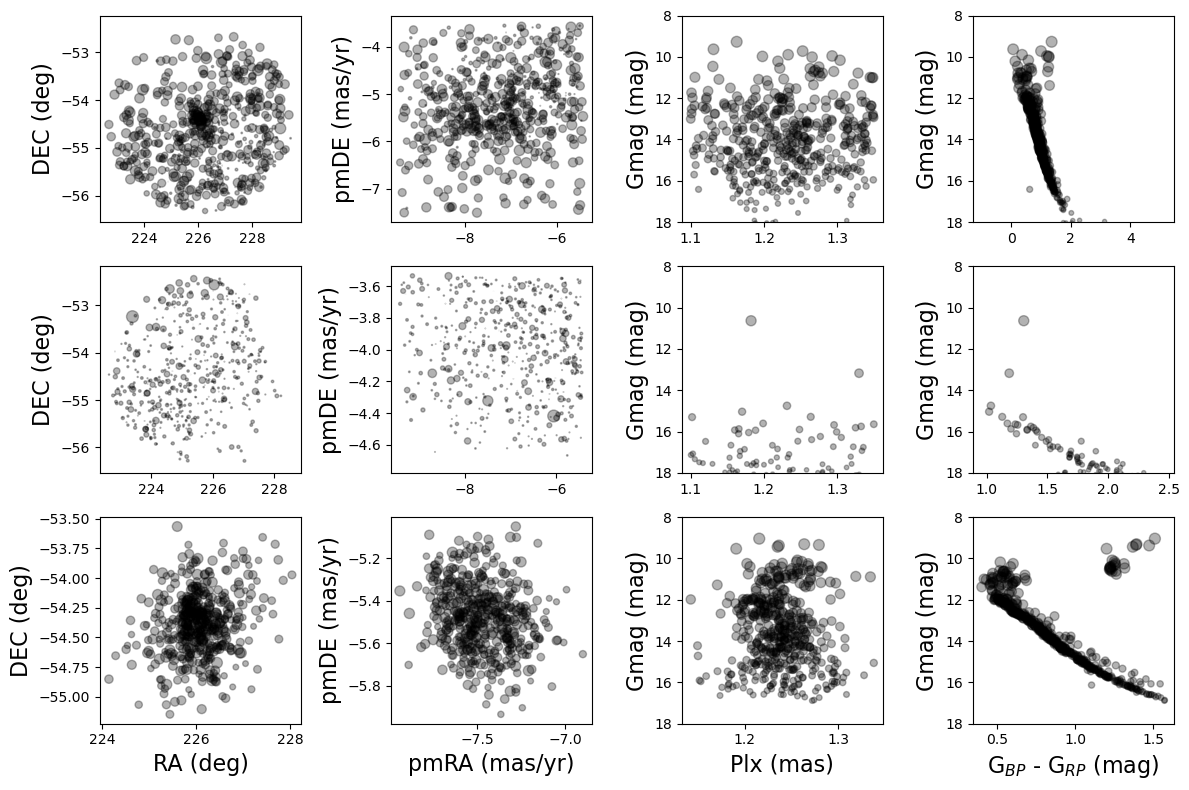

In [12]:
fig,ax = plt.subplots(3,4, figsize=(12,8),tight_layout=True)

ax[0,0].scatter(a1.RAJ2000, a1.DEJ2000, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,0].set_ylabel("DEC (deg)",fontsize=16)
ax[0,1].scatter(a1.pmRA, a1.pmDE, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[0,2].scatter(a1.Plx_corr, a1.Gmag, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,2].set_ylim(18,8)
ax[0,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[0,3].scatter(a1["BP-RP"], a1.Gmag, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,3].set_ylim(18,8)
ax[0,3].set_ylabel("Gmag (mag)",fontsize=16)

ax[1,0].scatter(a2.RAJ2000, a2.DEJ2000, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,0].set_ylabel("DEC (deg)",fontsize=16)
ax[1,1].scatter(a2.pmRA, a2.pmDE, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[1,2].scatter(a2.Plx_corr, a2.Gmag, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,2].set_ylim(18,8)
ax[1,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[1,3].scatter(a2["BP-RP"], a2.Gmag, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,3].set_ylim(18,8)
ax[1,3].set_ylabel("Gmag (mag)",fontsize=16)

ax[2,0].scatter(a3.RAJ2000, a3.DEJ2000, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,0].set_xlabel("RA (deg)",fontsize=16)
ax[2,0].set_ylabel("DEC (deg)",fontsize=16)
ax[2,1].scatter(a3.pmRA, a3.pmDE, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,1].set_xlabel("pmRA (mas/yr)",fontsize=16)
ax[2,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[2,2].scatter(a3.Plx_corr, a3.Gmag, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,2].set_ylim(18,8)
ax[2,2].set_xlabel("Plx (mas)",fontsize=16)
ax[2,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[2,3].scatter(a3["BP-RP"], a3.Gmag, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,3].set_ylim(18,8)
ax[2,3].set_xlabel(r"G$_{BP}$ - G$_{RP}$ (mag)",fontsize=16)
ax[2,3].set_ylabel("Gmag (mag)",fontsize=16)


In [13]:
cluster1 = a3
cluster2 = a1

In [14]:
cluster1 = cluster1.drop(columns=["cluster"])
cluster2 = cluster2.drop(columns=["cluster"])

In [15]:
#cluster1.to_csv('Catalogues/NGC5822_8_Pop1.csv', index=False) 
#cluster2.to_csv('Catalogues/NGC5822_9_Pop2.csv', index=False) 